<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Proyecto_Final_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

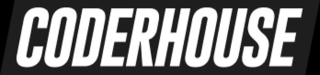

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **PROYECTO FINAL - (Primera Versión)**

*AUTOR: Eduardo Ettlin

Estructurar Proyecto Final con el siguiente esquema: 

1. Resumen y Motivación de la Audiencia.

2. Generar preguntas de interés o hipótesis que queremos resolver con el análisis de los datos.

3. Análisis Exploratorio de Datos EDA

4. Recomendaciones en base a los insights observados

5. Definición del Objetivo, Contexto Comercial, Contexo Analítico.

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **DATASET ELEGIDO:**

Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
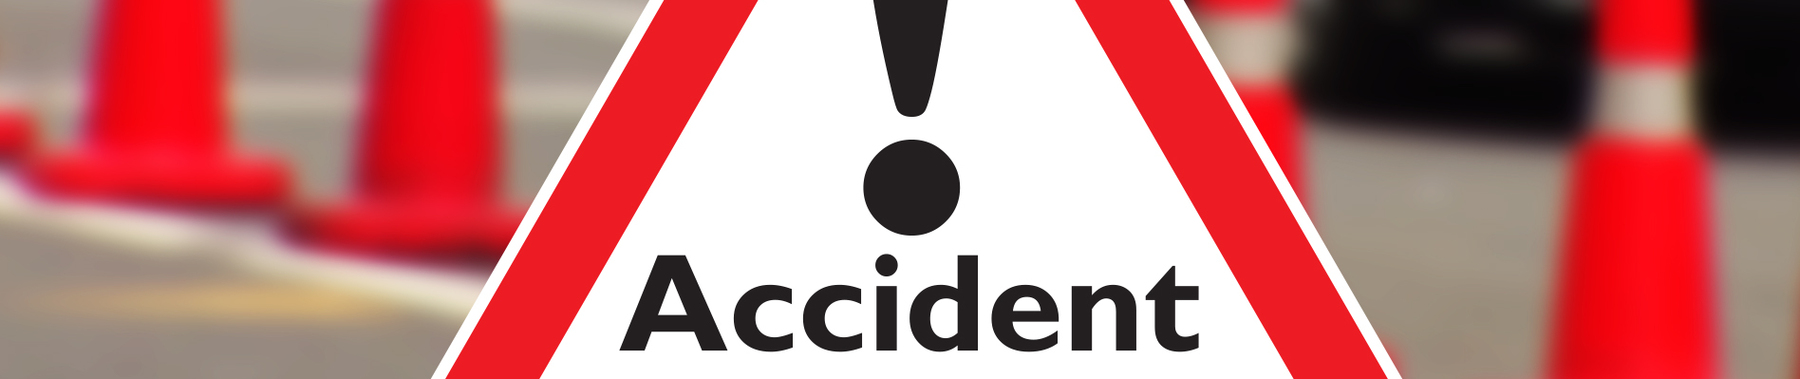


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



Accidentes en EE. UU. (2016 - 2021) Un conjunto de datos de accidentes de tráfico en todo el país (2016 - 2021)

Acerca del conjunto de datos Descripción Este es un conjunto de datos de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico. Estas API transmiten datos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos. Se entrega el siguiente set de datos con nombre “US_Accidents_Dec21_updated.csv”.

Contenido Este conjunto de datos se ha recopilado en tiempo real mediante varias API de tráfico. Actualmente, contiene datos de accidentes recopilados desde febrero de 2016 hasta diciembre de 2021 para los Estados Unidos contiguos.

Inspiración “US-Accidentes” se puede utilizar para numerosas aplicaciones, como la predicción de accidentes automovilísticos en tiempo real, el estudio de ubicaciones de puntos críticos de accidentes automovilísticos, el análisis de víctimas y la extracción de reglas de causa y efecto para predecir accidentes automovilísticos, y el estudio del impacto de la precipitación u otros estímulos ambientales en la ocurrencia de accidentes. La publicación más reciente del conjunto de datos también puede ser útil para estudiar el impacto de COVID-19 en el comportamiento del tráfico y los accidentes.

Incluye dataset con mas de 2 millones de registros y 47 columnas.

## Introducción


**Contexto empresarial.** Estados Unidos ha experimentado un aumento en el número de accidentes en las carreteras. Quieren saber si el número de accidentes ha aumentado en las últimos meses. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante los últimos 5 años(desde 2016 hasta 2021).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como geologalización, hora del día, condiciones climáticas, gravedad del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, gravedad del accidente, , etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales compementarios
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por estado o cuidad? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?

   
**Fuentes para el AC:** <br> [Caso Estudio - US Accidentes de Tráfico](https://docs.google.com/document/d/16zvQYkQ2vV71mZ_4ZNimflcq4gFMe6Uq/edit?usp=share_link&ouid=101863336576100131323&rtpof=true&sd=true)
<br>
[Dataset](https://drive.google.com/file/d/1cge_hK7Va8FpgKtd-M_9vQYBLQmJd7pX/view?usp=share_link)


# **Paquetes Utilizados**

Se importan los paquetes necesarios

In [2]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import numpy as np # algebra lineal

# visualizaciones
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 

import statsmodels.formula.api as sm #regresion lineal


In [3]:
! pip install chart_studio -q
! pip install bqplot -q
! pip install pingouin -q   #quiet mode (Sin tanto detalle)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import chart_studio.plotly     as py

# **Importación de Datos**

Se importan los datos y se procesan

In [5]:
full_df =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv') 
full_df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.000,NaN,55.000,29.650,10.000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.000,29.800,93.000,29.690,10.000,WSW,10.400,0.010,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Diccionario de Datos con descripciones ampliadas


In [6]:
d_desc = {'ID':'Este es un identificador único del registro de accidentes. ' ,
'Severity':'Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, breve retraso como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, mucho retraso). ' ,
'Start_Time':'Muestra la hora de inicio del accidente en la zona horaria local. ' ,
'End_Time':'Muestra la hora de finalización del accidente en la zona horaria local. La hora de finalización aquí se refiere a cuándo se descartó el impacto del accidente en el flujo de tráfico. ' ,
'Start_Lat':'Muestra la latitud en coordenadas GPS del punto de inicio. ' ,
'Start_Lng':'Muestra la longitud en coordenadas GPS del punto de inicio. ' ,
'End_Lat':'Muestra la latitud en coordenadas GPS del punto final. ' ,
'End_Lng':'Muestra la longitud en coordenadas GPS del punto final. ' ,
'Distance(mi)':'La longitud de la extensión de la carretera afectada por el accidente. ' ,
'Description':'Muestra la descripción del accidente en lenguaje natural. ' ,
'Number':'Muestra el número de calle en el campo de dirección. ' ,
'Street':'Muestra el nombre de la calle en el campo de dirección. ' ,
'Side':'Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección. ' ,
'City':'Muestra la ciudad en el campo de dirección. ' ,
'County':'Muestra el condado en el campo de dirección. ' ,
'State':'Muestra el estado en el campo de dirección. ' ,
'Zipcode':'Muestra el código postal en el campo de dirección. ' ,
'Country':'Muestra el país en el campo de dirección. ' ,
'Timezone':'Muestra la zona horaria según la ubicación del accidente (este, centro, etc.). ' ,
'Airport_Code':'Indica una estación meteorológica en el aeropuerto que es la más cercana al lugar del accidente. ' ,
'Weather_Timestamp':'Muestra la marca de tiempo del registro de observación meteorológica (en hora local). ' ,
'Temperature(F)':'Muestra la temperatura (en Fahrenheit). ' ,
'Wind_Chill(F)':'Muestra la sensación térmica (en Fahrenheit). ' ,
'Humidity(%)':'Muestra la humedad (en porcentaje). ' ,
'Pressure(in)':'Muestra la presión del aire (en pulgadas). ' ,
'Visibility(mi)':'Muestra la visibilidad (en millas). ' ,
'Wind_Direction':'Muestra la dirección del viento. ' ,
'Wind_Speed(mph)':'Muestra la velocidad del viento (en millas por hora). ' ,
'Precipitation(in)':'Muestra la cantidad de precipitación en pulgadas, si hay alguna. ' ,
'Weather_Condition':'Muestra las condiciones meteorológicas (lluvia, nieve, tormenta, niebla, etc.) ' ,
'Amenity':'Una anotación de PDI que indica la presencia de un servicio en un lugar cercano. ' ,
'Bump':'Una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano. ' ,
'Crossing':'Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana. ' ,
'Give_Way':'Una anotación de PDI que indica la presencia de give_way en una ubicación cercana. ' ,
'Junction':'Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana. ' ,
'No_Exit':'Una anotación de PDI que indica la presencia de no_exit en una ubicación cercana. ' ,
'Railway':'Una anotación de PDI que indica la presencia de vías férreas en un lugar cercano. ' ,
'Roundabout':'Una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana. ' ,
'Station':'Una anotación de PDI que indica la presencia de una estación en una ubicación cercana. ' ,
'Stop':'Una anotación de PDI que indica la presencia de una parada en una ubicación cercana. ' ,
'Traffic_Calming':'Una anotación de PDI que indica la presencia de Traffic_Calming en una ubicación cercana. ' ,
'Traffic_Signal':'Una anotación de PDI que indica la presencia de Traffic_signal en una ubicación cercana. ' ,
'Turning_Loop':'Una anotación de PDI que indica la presencia de turning_loop en una ubicación cercana. ' ,
'Sunrise_Sunset':'Muestra el período del día (es decir, día o noche) en función del amanecer/atardecer. ' ,
'Civil_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo civil . ' ,
'Nautical_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico . ' ,
'Astronomical_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronómico . ' }

**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [7]:
full_df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.000,NaN,55.000,29.650,10.000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.000,29.800,93.000,29.690,10.000,WSW,10.400,0.010,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### **Se visualiza la tupla de dimensiones de matriz que indica el número de filas y columnas de un DataFrame dado.**



In [8]:
full_df.shape

(2845342, 47)

**Se visualiza La información que contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).**

In [9]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,1101431.000,2776068.000,2375699.000,2772250.000,2786142.000,2774796.000,2687398.000,2295884.000
mean,2.138,36.245,-97.115,36.245,-97.114,0.703,8089.408,61.794,59.658,64.365,29.472,9.099,7.395,0.007
std,0.479,5.364,18.318,5.364,18.318,1.560,18360.094,18.623,21.161,22.875,1.045,2.718,5.527,0.093
min,1.000,24.566,-124.548,24.566,-124.546,0.000,0.000,-89.000,-89.000,1.000,0.000,0.000,0.000,0.000
25%,2.000,33.445,-118.033,33.446,-118.033,0.052,1270.000,50.000,46.000,48.000,29.310,10.000,3.500,0.000
50%,2.000,36.099,-92.418,36.098,-92.418,0.244,4007.000,64.000,63.000,67.000,29.820,10.000,7.000,0.000
75%,2.000,40.160,-80.372,40.161,-80.373,0.764,9567.000,76.000,76.000,83.000,30.010,10.000,10.000,0.000
max,4.000,49.001,-67.113,49.075,-67.109,155.186,9999997.000,196.000,196.000,100.000,58.900,140.000,1087.000,24.000


In [21]:
full_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Temp', 'Hora', 'Anio_Mes', 'day_of_week'],
      dtype='object')

Las variables disponibles seleccionadas son:
* Severity
* Temperature(F)
* Wind_Chill(F)
* Precipitation(in)


#### Valores Nulos:

In [11]:
full_df.fillna(0, inplace=True)   # Se reemplazan los valores nulos por 0

#### Valores duplicados:

Data Frame de Valóres Numéricos


In [12]:
df_num = full_df.select_dtypes('number') # datos númericos
df_num['Stop'] = full_df['Stop']
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
0,3,40.109,-83.093,40.112,-83.032,3.230,0.000,42.100,36.100,58.000,29.760,10.000,10.400,0.000,False
1,2,39.865,-84.063,39.865,-84.049,0.747,0.000,36.900,0.000,91.000,29.680,10.000,0.000,0.020,False
2,2,39.103,-84.525,39.102,-84.524,0.055,0.000,36.000,0.000,97.000,29.700,10.000,0.000,0.020,False
3,2,41.062,-81.538,41.062,-81.535,0.123,0.000,39.000,0.000,55.000,29.650,10.000,0.000,0.000,False
4,3,39.172,-84.493,39.170,-84.502,0.500,0.000,37.000,29.800,93.000,29.690,10.000,10.400,0.010,False


In [13]:
df_num.drop_duplicates(inplace=True) #df_num = df_num.drop_duplicates()

## AJUSTES de OBJETOS y CAMPOS ADICIONALES ###

Se agrecan algunas columnas calculadas a partir de los mismos datos


In [14]:
full_df['Temp'] = full_df['Temperature(F)'] + full_df['Wind_Chill(F)'] # Crear una variable numérica

In [15]:
# full_df['Start_Time','End_Time','Weather_Timestamp'] = full_df['Start_Time','End_Time','Weather_Timestamp'].apply(pd.to_datetime(format='%Y-%m-%d %H:%M:%S'))

In [16]:
full_df['Hora'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente

In [17]:
full_df['Anio_Mes'] =  pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES

In [18]:
full_df['day_of_week'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
full_df['day_of_week'] = full_df['day_of_week'].apply(lambda x: days[x])

In [19]:
full_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp,Hora,Anio_Mes,day_of_week
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,0.000,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.200,0,2016-02,Lunes
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,0.000,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,0.000,91.000,29.680,10.000,Calm,0.000,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,36.900,5,2016-02,Lunes
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,0.000,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,0.000,97.000,29.700,10.000,Calm,0.000,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,36.000,6,2016-02,Lunes


##Representación de los ejemplos##

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos visto.

<Axes: xlabel='Severity', ylabel='Count'>

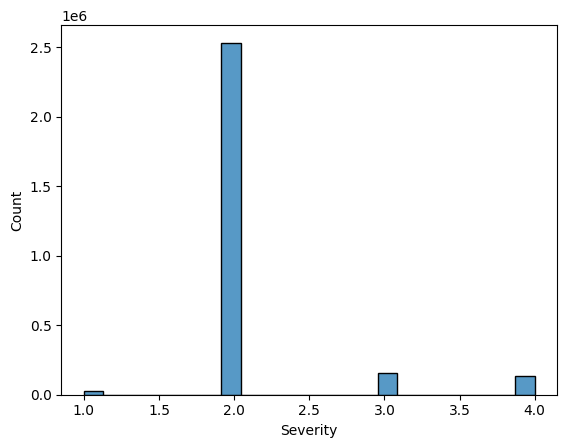

In [22]:
sns.histplot(full_df.Severity.dropna())

### Relación entre la HORA y la Cantidad y Seviridad de Accidentes ###

Fechas
Las fechas representan la variable tiempo, que no es trivial de representar en mi conjunto de datos.

¿Cómo afecta el tiempo al fenómeno que quiero estudiar?
¿Es importante de manera absoluta o de manera relativa?
¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:



<Axes: xlabel='Hora', ylabel='Count'>

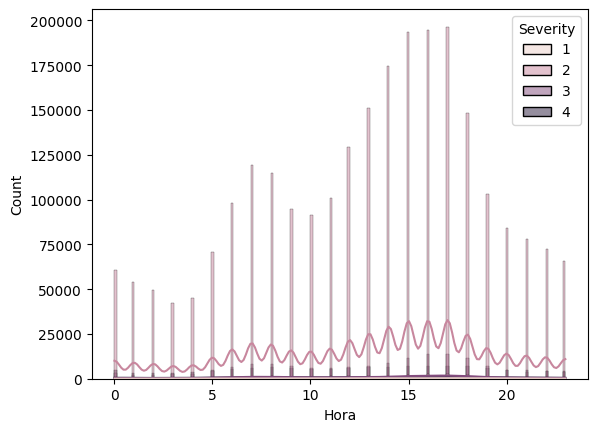

In [23]:
sns.histplot(data = full_df, x="Hora", hue ='Severity', kde = True)

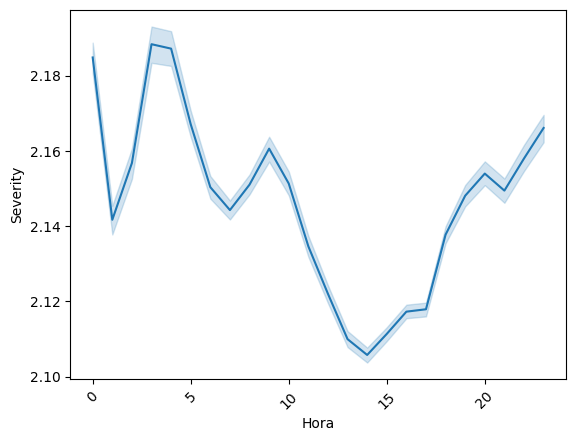

In [24]:

sns.lineplot(data = full_df, x='Hora', y='Severity')
plt.xticks(rotation=45);

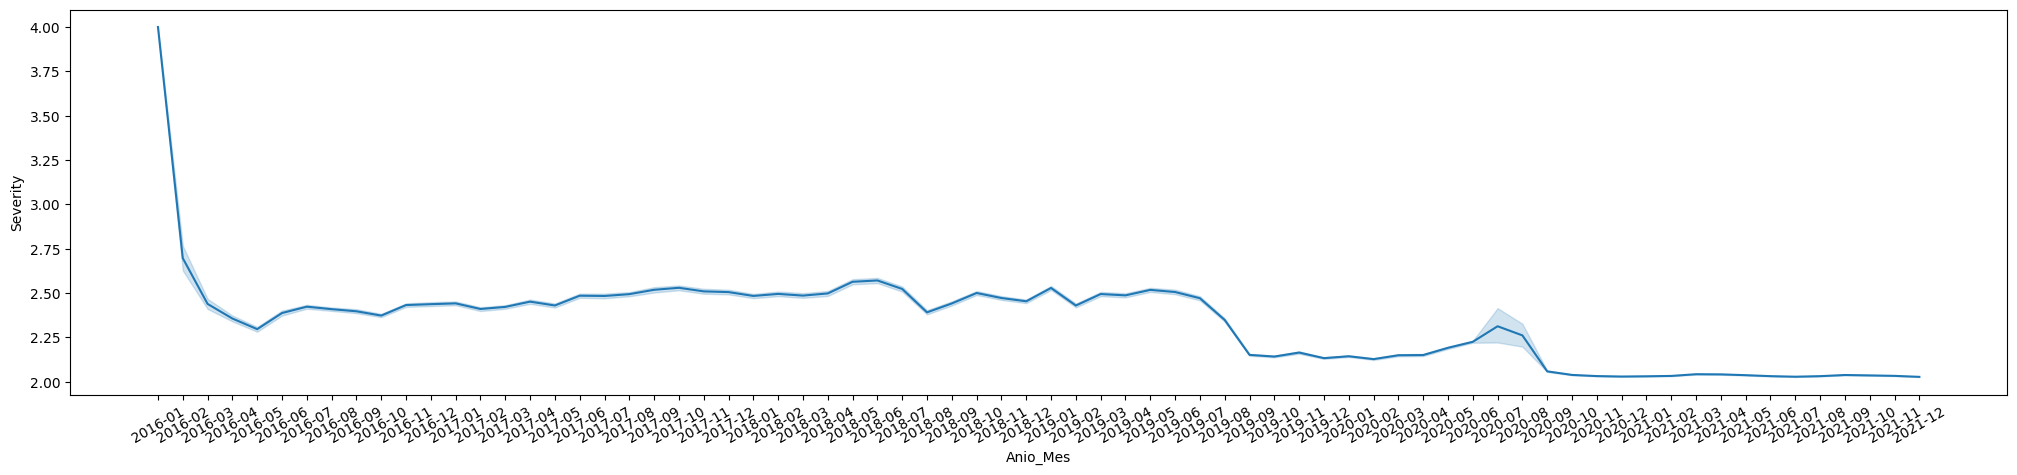

In [25]:
fig = plt.figure(figsize=(25, 5))
sns.lineplot(data=full_df.sort_values('Anio_Mes'), x='Anio_Mes', y='Severity')
plt.xticks(rotation=30);

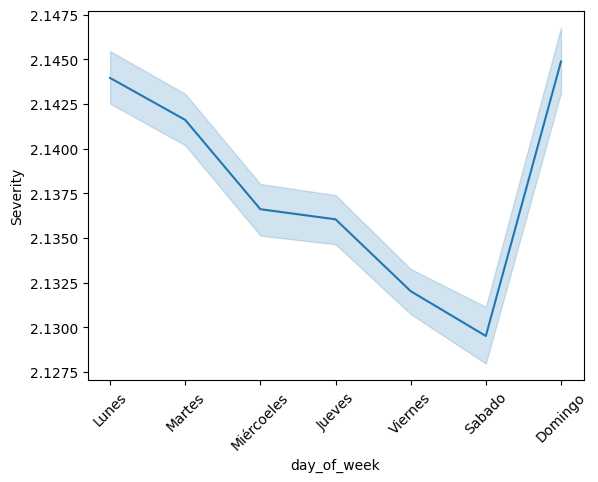

In [26]:
sns.lineplot(data = full_df, x='day_of_week', y='Severity')
plt.xticks(rotation=45);

# **Preguntas Básicas**

¿Que tan grave son los accidentes?

¿Están relacionados con el clima?

¿Qué ciudad en EE. UU. ha informado más no. de Casos de Accidentes en los últimos 5 años (2016-2020) ?

Por día, en promedio, ¿cuántos accidentes de tráfico se produjeron en EE. UU.?

¿En qué horas del día ocurrieron la mayoría de los accidentes en EE. UU.?

¿Cómo son las condiciones climáticas básicas en la mayoría de los casos de accidentes en EE.UU.?

¿Cuáles son los 10 estados con más no. de los casos de accidentes de tráfico en EE.UU.?

#### **1ra Pregunta**

¿Influyen las Condiciones Climáticas en la Cantidad de Accidentes?


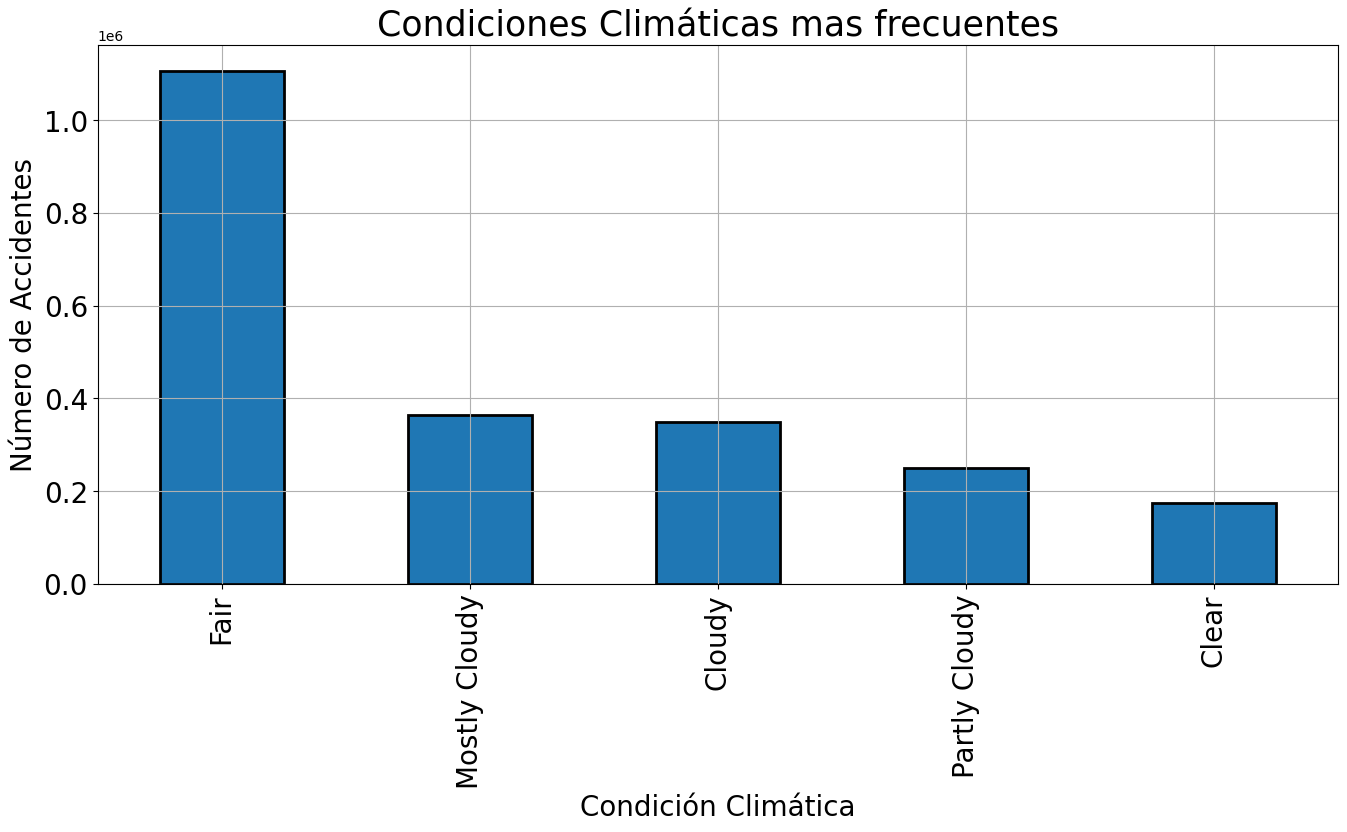

In [27]:
fig, ax=plt.subplots(figsize=(16,7))
full_df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Condición Climática',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Condiciones Climáticas mas frecuentes',fontsize=25)
plt.grid()
plt.ioff()

## ANALISIS del DATASET 

In [28]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora
count,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000,2845342.000
mean,2.138,36.245,-97.115,36.245,-97.114,0.703,3131.407,60.289,49.811,62.712,28.859,8.874,6.985,0.006,110.100,12.776
std,0.479,5.364,18.318,5.364,18.318,1.560,12083.628,20.714,29.400,24.769,4.332,3.034,5.632,0.084,45.021,5.838
min,1.000,24.566,-124.548,24.566,-124.546,0.000,0.000,-89.000,-89.000,0.000,0.000,0.000,0.000,0.000,-178.000,0.000
25%,2.000,33.445,-118.033,33.446,-118.033,0.052,0.000,48.000,30.000,46.000,29.270,10.000,3.000,0.000,76.000,8.000
50%,2.000,36.099,-92.418,36.098,-92.418,0.244,0.000,63.000,57.000,66.000,29.810,10.000,6.900,0.000,114.000,14.000
75%,2.000,40.160,-80.372,40.161,-80.373,0.764,2192.000,75.900,73.000,83.000,30.010,10.000,10.000,0.000,146.000,17.000
max,4.000,49.001,-67.113,49.075,-67.109,155.186,9999997.000,196.000,196.000,100.000,58.900,140.000,1087.000,24.000,392.000,23.000


##¿Hay muchas columnas en 0?


In [29]:
cols = full_df[full_df == 0].count(axis=0)
cols[cols > 0]

Distance(mi)              385441
Number                   1743912
Street                         2
City                         137
Zipcode                     1319
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             70258
Wind_Chill(F)             470965
Humidity(%)                73092
Pressure(in)               59201
Visibility(mi)             73784
Wind_Direction             73775
Wind_Speed(mph)           591580
Precipitation(in)        2653700
Weather_Condition          70636
Amenity                  2817352
Bump                     2844321
Crossing                 2645130
Give_Way                 2838474
Junction                 2554837
No_Exit                  2841048
Railway                  2822711
Roundabout               2845219
Station                  2777347
Stop                     2794942
Traffic_Calming          2843630
Traffic_Signal           2580079
Turning_Loop             2845342
Sunrise_Su

Recordemos que tenemos 2.845.342 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

In [36]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(full_df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

## Recuento de Accidentes por Autopista

In [46]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df

,Street No.,Cases
0,I-95 N,39853
1,I-5 N,39402
2,I-95 S,36425
3,I-5 S,30229
4,I-10 E,26164
5,I-10 W,25298
6,I-80 W,17545
7,I-80 E,16873
8,I-405 N,13708
9,I-15 N,12675


In [53]:
import matplotlib.cm as cm  
import matplotlib.patches as mpatches

In [56]:
full_df.shape[0]

2845342

In [57]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'white', alpha = .8)

total = full_df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 30000)
ax1.axes.set_ylim(-1000, 40000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2020)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)

    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 30000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 30000)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

## Reducción del DF para analizar correlación ##


In [58]:
small_df = full_df[['Severity', 'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition', 'Hora', 'day_of_week', 'Anio_Mes']]
small_df.head(7)

,Severity,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Weather_Condition,Hora,day_of_week,Anio_Mes
0,3,Dublin,Franklin,OH,42.100,36.100,58.000,29.760,10.000,Light Rain,0,Lunes,2016-02
1,2,Dayton,Montgomery,OH,36.900,0.000,91.000,29.680,10.000,Light Rain,5,Lunes,2016-02
2,2,Cincinnati,Hamilton,OH,36.000,0.000,97.000,29.700,10.000,Overcast,6,Lunes,2016-02
3,2,Akron,Summit,OH,39.000,0.000,55.000,29.650,10.000,Overcast,6,Lunes,2016-02
4,3,Cincinnati,Hamilton,OH,37.000,29.800,93.000,29.690,10.000,Light Rain,7,Lunes,2016-02
5,2,Williamsburg,Clermont,OH,35.600,29.200,100.000,29.660,10.000,Overcast,8,Lunes,2016-02
6,2,Dayton,Montgomery,OH,33.800,0.000,100.000,29.630,3.000,Mostly Cloudy,8,Lunes,2016-02


In [59]:
small_df.corr()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora
Severity,1.000,-0.041,-0.221,0.032,0.006,0.001,-0.018
Temperature(F),-0.041,1.000,0.602,-0.112,0.423,0.343,0.152
Wind_Chill(F),-0.221,0.602,1.000,-0.070,0.220,0.201,0.113
Humidity(%),0.032,-0.112,-0.070,1.000,0.372,-0.135,-0.197
Pressure(in),0.006,0.423,0.220,0.372,1.000,0.397,0.000
Visibility(mi),0.001,0.343,0.201,-0.135,0.397,1.000,0.072
Hora,-0.018,0.152,0.113,-0.197,0.000,0.072,1.000


## Correlación Básica con HEAT MAP ##

In [60]:
# Definir el Tamaplo
plt.figure(figsize=(16, 6))

# Archivar el heatmap object en una variable para manejar mejor las propiedades.
# Cambiar los valores del grafico. Colores entre  -1 y 1, y setear las anotaciones para ver las correlaciones.
heatmap = sns.heatmap(small_df.corr(), vmin=-1, vmax=1, annot=True)

# Ponérle un Tículo al mapa. 
heatmap.set_title('Mapa de Correlación -  Heatmap', fontdict={'fontsize':12}, pad=12);

In [61]:
heatmap

<Axes: title={'center': 'Mapa de Correlación -  Heatmap'}>